### Cliques

A clique of size K in an undirected graph $G=(V,E)$ is a subset graph $W \in V$ of size $|W| = K$ where the given subgraph is a complete graph i.e the number of edges in the sub graph is $\frac{K(K+1)}{2}$ .

Reference: https://arxiv.org/abs/1302.5843

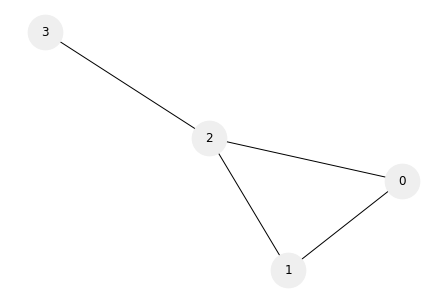

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

options = {'node_color': '#efefef','node_size': 1200,'with_labels':'True'}

n = 4
K = 3

G = nx.Graph()
G.add_nodes_from(nx.path_graph(n))
G.add_edges_from([(0,1), (0,2),(1,2),(2,3)])
nx.draw(G, **options)

The hamiltonian of the above problem is formed in a constraint rich way where if H = 0 for a given hamiltonian, their is a feasible solution of the clique problem with a subgraph of size K. We have two constraints:

1. The subgraph should be of size K.

$$ C_1 = A ( K - \sum_{v} x_v) ^ 2 $$

2. The number of edges in the subgraph should be $\frac{K(K+1)}{2}$ : 

$$ C_2 = B [ \frac{K(K+1)}{2} - \sum_{uv \in E} x_{uv} ] $$

The weighted sum of these two constraints form our hamiltonian.

In [9]:
from blueqat import vqe
from blueqat.pauli import qubo_bit as q
import numpy as np


b = np.zeros((n,n), dtype=int)

for k in G.edges:
    b[k[0]][k[1]] = 1

H = 0.0

C_1 =0.0



for i in range(n):
    C_1 += q(i)
    
C_1 = (K - C_1)**2


C_2 = 0.0

for i in range(n):
    for j in range(n):
        if(b[i,j]==1):
            C_2 += q(i)*q(j)
            
C_2 = (K*(K+1)/2 - C_2)


H = C_1*30 + C_2*5


step = 2

result = vqe.Vqe(vqe.QaoaAnsatz(H, step)).run()
print(result.most_common(4))
    

(((1, 1, 1, 0), 0.26209881832208837), ((1, 0, 1, 1), 0.21059659178161513), ((0, 1, 1, 1), 0.21059659178161513), ((1, 1, 1, 1), 0.10649215504698782))
